<p align="right">
    <img src="Zewail-City.png">
</p>


---

# Machine Learning Lab #6


In [1]:
# import Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Sklearn
from sklearn.datasets import load_breast_cancer
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# SVM
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Descion Tree
from sklearn.tree import DecisionTreeClassifier

/home/hazem/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## EDA

### Load

In [2]:
# Read the Data
cancer = load_breast_cancer()
x = cancer.data  # Features
df = pd.DataFrame(x, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Initial Data Overview

In [3]:
# Data head
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Null counts
print("null counts:")
df.isnull().sum()

null counts:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
# Data statistical summary
df.describe(include="all")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---

### Outliers Detection and Visualization

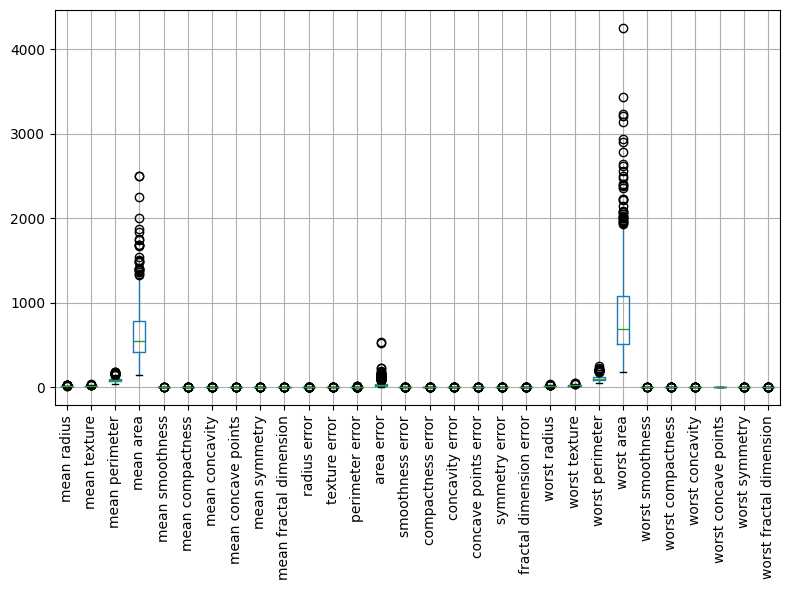

In [7]:
# Boxplot
df.boxplot(rot=90, figsize=(8, 6))
plt.tight_layout()

# Display
plt.show()

---

### Standardization

In [8]:
# Standardization (Z_score) [SVM, Logistic, KNN, PCA]
df_stand = df.copy()
standardized_data = StandardScaler().fit_transform(df)
df_stand = pd.DataFrame(standardized_data, columns=df_stand.columns, index=df_stand.index)

In [9]:
df_stand.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


---

### Split Dataset

In [10]:
# Supposing final features and target
X = df_stand # features
y = pd.DataFrame(cancer.target) # target

In [11]:
# First split: Train + Temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train
# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Dictionary to store all metrics for comparison
model_metrics = {}

In [12]:
# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (398, 30)
y_train: (398,)
X_val: (85, 30)
y_val: (85, 1)
X_test: (86, 30)
y_test: (86, 1)


---

## ML

### Logistic Regression

In [13]:
# Initialize and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_LR = model.predict(X_test)

In [14]:
# model metrics
model_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_LR),
    'Precision': precision_score(y_test, y_LR),
    'Recall': recall_score(y_test, y_LR),
    'F1 Score': f1_score(y_test, y_LR)
}

In [15]:
# accuracy
accuracy = accuracy_score(y_test, y_LR)
print(f"Model Accuracy: {accuracy* 100} %")

Model Accuracy: 97.67441860465115 %


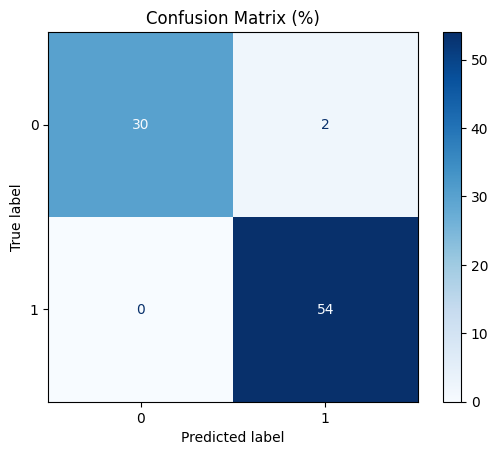

In [16]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_LR,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [17]:
# Generate and print the classification report
print(classification_report(y_test, y_LR))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



---

### SVM

In [18]:
# Initialize and Train the Model
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Predict
y_sv = model.predict(X_test)

In [19]:
# model metrics
model_metrics['SVC Linear'] = {
    'Accuracy': accuracy_score(y_test, y_sv),
    'Precision': precision_score(y_test, y_sv),
    'Recall': recall_score(y_test, y_sv),
    'F1 Score': f1_score(y_test, y_sv)
}

In [20]:
# accuracy
accuracy = accuracy_score(y_test, y_sv)
print(f"Model Accuracy: {accuracy* 100} %")

Model Accuracy: 97.67441860465115 %


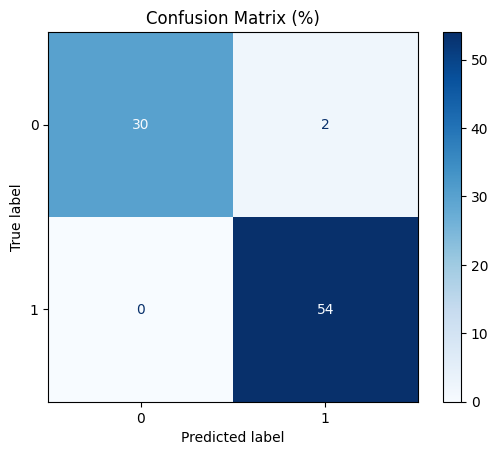

In [21]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_sv,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [22]:
# Generate and print the classification report
print(classification_report(y_test, y_sv))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



---

### KNNN

In [23]:
# Initialize and Train the Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_k = model.predict(X_test)

In [24]:
# model metrics
model_metrics['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_k),
    'Precision': precision_score(y_test, y_k),
    'Recall': recall_score(y_test, y_k),
    'F1 Score': f1_score(y_test, y_k)
}

In [25]:
# accuracy
accuracy = accuracy_score(y_test, y_k)
print(f"Model Accuracy: {accuracy* 100} %")

Model Accuracy: 95.34883720930233 %


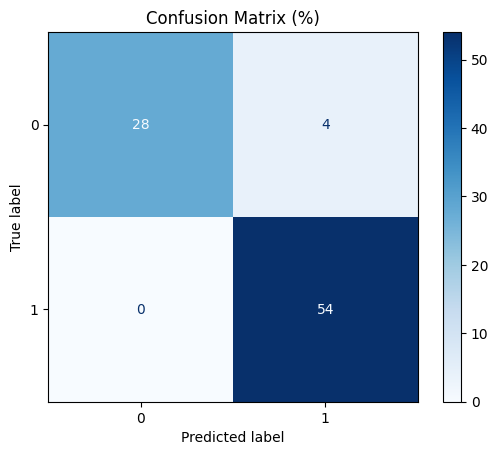

In [26]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_k,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [27]:
# Generate and print the classification report
print(classification_report(y_test, y_k))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.93      1.00      0.96        54

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



---

### Decision Tree

In [28]:
# Initialize and Train the Model
model = DecisionTreeClassifier(criterion="gini", max_depth=3) 

# Train the Decision Tree Classifier
model = model.fit(X_train, y_train)

# Predict
y_t = model.predict(X_test)

In [29]:
# model metrics
model_metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_t),
    'Precision': precision_score(y_test, y_t),
    'Recall': recall_score(y_test, y_t),
    'F1 Score': f1_score(y_test, y_t)
}

In [30]:
# accuracy
accuracy = accuracy_score(y_test, y_t)
print(f"Model Accuracy: {accuracy* 100} %")

Model Accuracy: 90.69767441860465 %


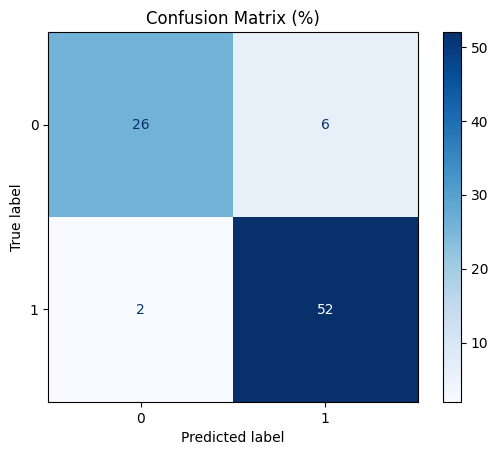

In [31]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_t,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [32]:
# Generate and print the classification report
print(classification_report(y_test, y_t))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.90      0.96      0.93        54

    accuracy                           0.91        86
   macro avg       0.91      0.89      0.90        86
weighted avg       0.91      0.91      0.91        86



---

### Models Comparison

In [33]:
# Convert the dictionary to a pandas DataFrame for easier plotting
metrics_df = pd.DataFrame(model_metrics).T * 100 # Multiply by 100 to show as percentage
# head
metrics_df.head()

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,97.674419,96.428571,100.000000,98.181818
SVC Linear,97.674419,96.428571,100.000000,98.181818
KNN,95.348837,93.103448,100.000000,96.428571
Decision Tree,90.697674,89.655172,96.296296,92.857143


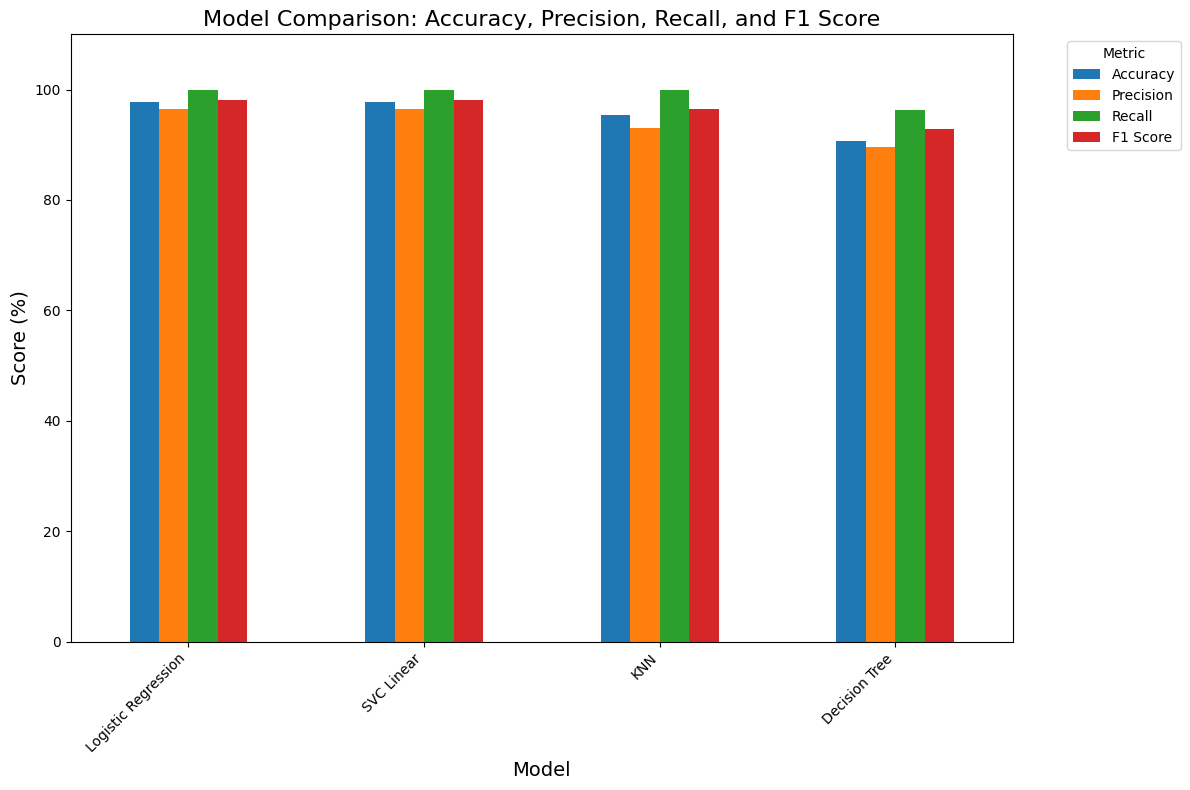

In [34]:
# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 8))

# Use pandas built-in plot function which uses matplotlib internally
metrics_df.plot(kind='bar', ax=ax)

# Customizing the plot
ax.set_title('Model Comparison: Accuracy, Precision, Recall, and F1 Score', fontsize=16)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylim(0, 110)
ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') # Rotate model names for readability
plt.tight_layout()

# Display the plot
plt.show()

---